In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/jeans_measurements.csv',encoding="ISO-8859-1")

df.head()

,id,ean_no,title,bucket_code,gender,collection,cat,waist,rise_value,hip,...,measure_username,measure_ip,washcare_print,barcode_print,design_data,washcarePrint_date,washcare_username,measurement_done,measure_date,design_date
0,2,9111001020019,UnExcess Pledge | Light Indigo Low Rise Slim J...,UNTPMD0000002,M,TP,BO,33.56,9.750,42.45,...,bhumi@un,106.51.77.80,YES,NaN,NaN,2023-06-07 04:07:51,washcare_print,NaN,NaN,NaN
1,3,9111001018077,UnExcess Pledge | Mid Indigo Mid Rise Slim Jeans,UNTPMD0000044,M,TP,BO,32.25,10.750,40.75,...,bhumi@un,106.51.77.80,YES,NaN,NaN,2023-05-03 08:05:37,NaN,NaN,NaN,NaN
2,4,9111001019055,UnExcess Pledge | Mid Indigo Mid Rise Bootcut ...,UNTPMD0000047,M,TP,BO,33.00,10.375,42.25,...,bhumi@un,106.51.77.80,YES,NaN,NaN,2023-05-03 08:54:38,NaN,NaN,NaN,NaN
3,5,9111001019003,UnWaste Pledge | Dark Indigo Mid Rise Straight...,UNTPMD0000082,M,TP,BO,31.25,10.125,39.00,...,bhumi@un,NaN,NaN,NaN,NaN,2023-05-03 07:14:05,NaN,NaN,NaN,NaN
4,6,9111001019065,UnExcess Pledge | Mid Indigo Mid Rise Skinny J...,UNTPMD0000043,M,TP,BO,33.75,10.500,38.75,...,bhumi@un,106.51.77.80,NaN,NaN,NaN,2023-05-03 08:56:05,NaN,NaN,NaN,NaN


In [6]:
# We only need to keep the measurement details

df_measurements = df.iloc[:, 4:16]

df_measurements.head()


,gender,collection,cat,waist,rise_value,hip,thigh,inseam,outseam,bottom_opening,un_waist,eu_size
0,M,TP,BO,33.56,9.750,42.45,23.75,28.875,37.750,16.50,33.0,50.0
1,M,TP,BO,32.25,10.750,40.75,24.75,29.875,39.250,15.75,32.0,48.0
2,M,TP,BO,33.00,10.375,42.25,24.50,32.125,41.250,18.00,33.0,50.0
3,M,TP,BO,31.25,10.125,39.00,24.00,30.875,40.750,17.00,31.0,48.0
4,M,TP,BO,33.75,10.500,38.75,23.00,31.375,40.375,13.00,33.0,50.0


In [7]:
# We dont need the collection and the category columns. We can drop them.
df_measurements = df_measurements.drop(['collection', 'cat'], axis=1)

df_measurements.head()

,gender,waist,rise_value,hip,thigh,inseam,outseam,bottom_opening,un_waist,eu_size
0,M,33.56,9.750,42.45,23.75,28.875,37.750,16.50,33.0,50.0
1,M,32.25,10.750,40.75,24.75,29.875,39.250,15.75,32.0,48.0
2,M,33.00,10.375,42.25,24.50,32.125,41.250,18.00,33.0,50.0
3,M,31.25,10.125,39.00,24.00,30.875,40.750,17.00,31.0,48.0
4,M,33.75,10.500,38.75,23.00,31.375,40.375,13.00,33.0,50.0


In [18]:
#Gender based analysis

df_male = df_measurements[df_measurements['gender'] == 'M']
df_female = df_measurements[df_measurements['gender'] == 'W']

In [10]:
df_male.head()

,gender,waist,rise_value,hip,thigh,inseam,outseam,bottom_opening,un_waist,eu_size
0,M,33.56,9.750,42.45,23.75,28.875,37.750,16.50,33.0,50.0
1,M,32.25,10.750,40.75,24.75,29.875,39.250,15.75,32.0,48.0
2,M,33.00,10.375,42.25,24.50,32.125,41.250,18.00,33.0,50.0
3,M,31.25,10.125,39.00,24.00,30.875,40.750,17.00,31.0,48.0
4,M,33.75,10.500,38.75,23.00,31.375,40.375,13.00,33.0,50.0


In [11]:
# We can drop the gender column now
df_male = df_male.drop(['gender'], axis=1)
df_male.head()

,waist,rise_value,hip,thigh,inseam,outseam,bottom_opening,un_waist,eu_size
0,33.56,9.750,42.45,23.75,28.875,37.750,16.50,33.0,50.0
1,32.25,10.750,40.75,24.75,29.875,39.250,15.75,32.0,48.0
2,33.00,10.375,42.25,24.50,32.125,41.250,18.00,33.0,50.0
3,31.25,10.125,39.00,24.00,30.875,40.750,17.00,31.0,48.0
4,33.75,10.500,38.75,23.00,31.375,40.375,13.00,33.0,50.0


<Axes: >

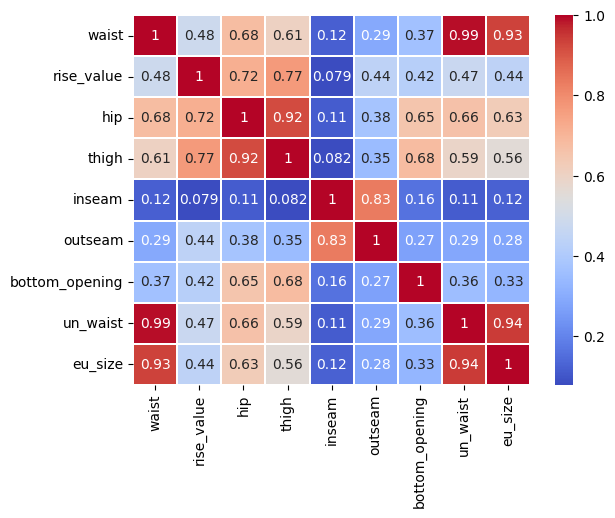

In [16]:
# Correlation matrix for male jeans
sns.heatmap(df_male.corr(), annot=True, cmap='coolwarm', linewidths=0.2,)

In [19]:
df_female.head()

,gender,waist,rise_value,hip,thigh,inseam,outseam,bottom_opening,un_waist,eu_size
9,W,33.50,10.500,41.25,25.00,31.375,41.250,19.75,34.0,42.0
10,W,32.25,9.625,38.50,22.25,31.500,40.625,18.75,32.0,40.0
11,W,33.50,10.625,43.00,25.75,30.625,40.500,20.00,34.0,42.0
12,W,34.00,9.125,40.00,23.75,32.000,40.750,12.75,34.0,42.0
13,W,34.75,9.625,43.00,25.00,32.125,41.375,21.50,34.0,42.0


In [20]:
df_female = df_female.drop('gender', axis=1)

<Axes: >

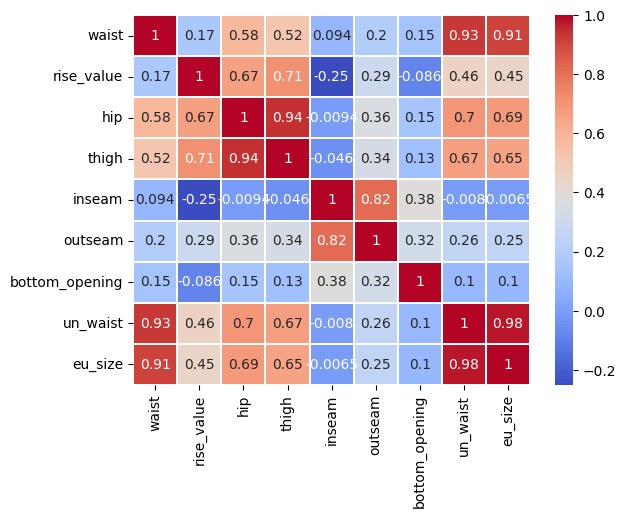

In [21]:
sns.heatmap(data=df_female.corr(), annot=True, cmap='coolwarm', linewidths=0.2)

In [22]:
df_male.describe()

,waist,rise_value,hip,thigh,inseam,outseam,bottom_opening,un_waist,eu_size
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,34.035202,11.224618,42.797566,25.125174,30.896071,40.854833,16.585883,33.703755,49.780250
std,1.949525,1.043204,3.297613,2.060154,1.638376,2.015399,2.003786,1.943456,1.718845
min,28.250000,7.500000,24.250000,19.000000,28.000000,36.250000,10.750000,28.000000,44.000000
25%,32.750000,10.375000,40.500000,23.750000,29.625000,39.500000,15.250000,32.000000,48.000000
50%,34.250000,11.125000,43.000000,25.250000,30.875000,40.750000,16.750000,34.000000,50.000000
75%,35.750000,12.000000,45.250000,26.500000,32.000000,42.125000,18.000000,35.000000,50.000000
max,36.750000,13.750000,53.000000,30.750000,36.000000,55.000000,22.000000,36.000000,52.000000


In [23]:
df_female.describe()

,waist,rise_value,hip,thigh,inseam,outseam,bottom_opening,un_waist,eu_size
count,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000
mean,31.105829,9.920751,38.117747,22.589904,29.966985,39.212497,15.846995,30.895915,38.465782
std,2.041685,1.544233,3.402514,2.216092,2.090402,2.221151,2.932485,2.301142,2.409975
min,25.000000,6.125000,17.500000,16.500000,24.000000,32.000000,8.000000,26.000000,34.000000
25%,29.750000,8.750000,35.750000,21.000000,28.500000,37.750000,13.500000,29.000000,36.000000
50%,31.250000,9.875000,38.000000,22.500000,30.125000,39.250000,16.000000,31.000000,38.000000
75%,32.750000,11.000000,40.250000,24.000000,31.500000,40.750000,18.000000,33.000000,40.000000
max,35.750000,15.500000,51.750000,31.000000,34.875000,46.375000,28.500000,35.000000,46.000000


array([[<Axes: title={'center': 'waist'}>,
        <Axes: title={'center': 'rise_value'}>,
        <Axes: title={'center': 'hip'}>],
       [<Axes: title={'center': 'thigh'}>,
        <Axes: title={'center': 'inseam'}>,
        <Axes: title={'center': 'outseam'}>],
       [<Axes: title={'center': 'bottom_opening'}>,
        <Axes: title={'center': 'un_waist'}>,
        <Axes: title={'center': 'eu_size'}>]], dtype=object)

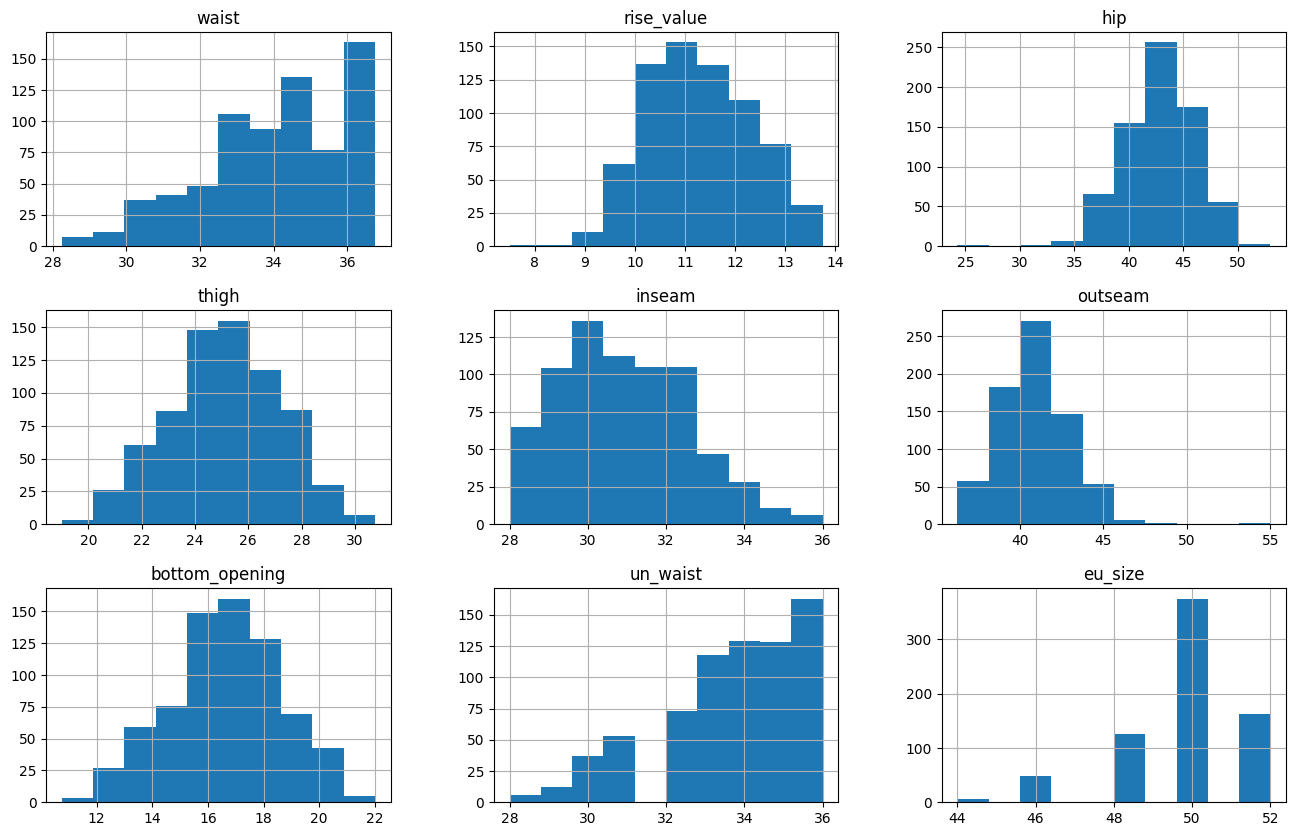

In [26]:
df_male.hist(figsize=(16,10))

<Axes: >

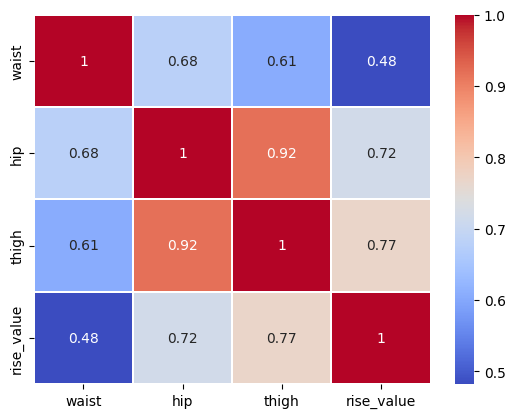

In [28]:
# Male jeans highly correlated measurements
df_male_corr = df_male[["waist", "hip", "thigh", "rise_value"]]

sns.heatmap(data= df_male_corr.corr(), annot=True, cmap='coolwarm', linewidths=0.2)

<Axes: >

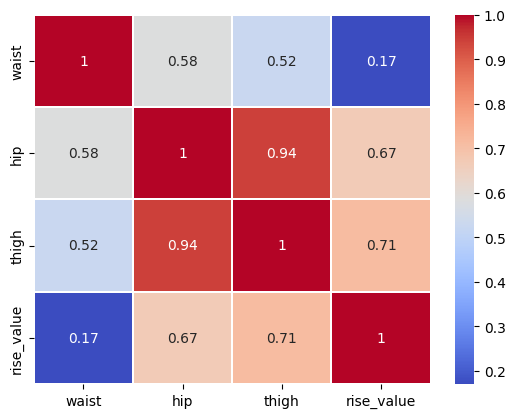

In [30]:
# female jeans highly correlated measurements
df_female_corr = df_female[["waist", "hip", "thigh", "rise_value"]]

sns.heatmap(data=df_female_corr.corr(), annot=True, cmap='coolwarm', linewidths=0.2)